<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Breast_Diagnosis_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# !pip uninstall -y pandas tensorflow
# !pip install pandas tensorflow
# !pip install seaborn

In [ ]:
# Install latex
# !sudo apt-get update -y
# !sudo apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

In [11]:
# !pip install tf-slim

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.4044 - loss: 1.1025 - val_accuracy: 0.5194 - val_loss: 0.9744
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.5265 - loss: 0.9589 - val_accuracy: 0.5194 - val_loss: 0.9503
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.5065 - loss: 0.9617 - val_accuracy: 0.5194 - val_loss: 0.9248
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5188 - loss: 0.9173 - val_accuracy: 0.5194 - val_loss: 1.0631
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.5136 - loss: 0.9955 - val_accuracy: 0.5243 - val_loss: 0.9312
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.4809 - loss: 0.9874 - val_accuracy: 0.5194 - val_loss: 3.0470
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.5012 - loss: 1.4932 - val_accuracy: 0.5728 - val_lo

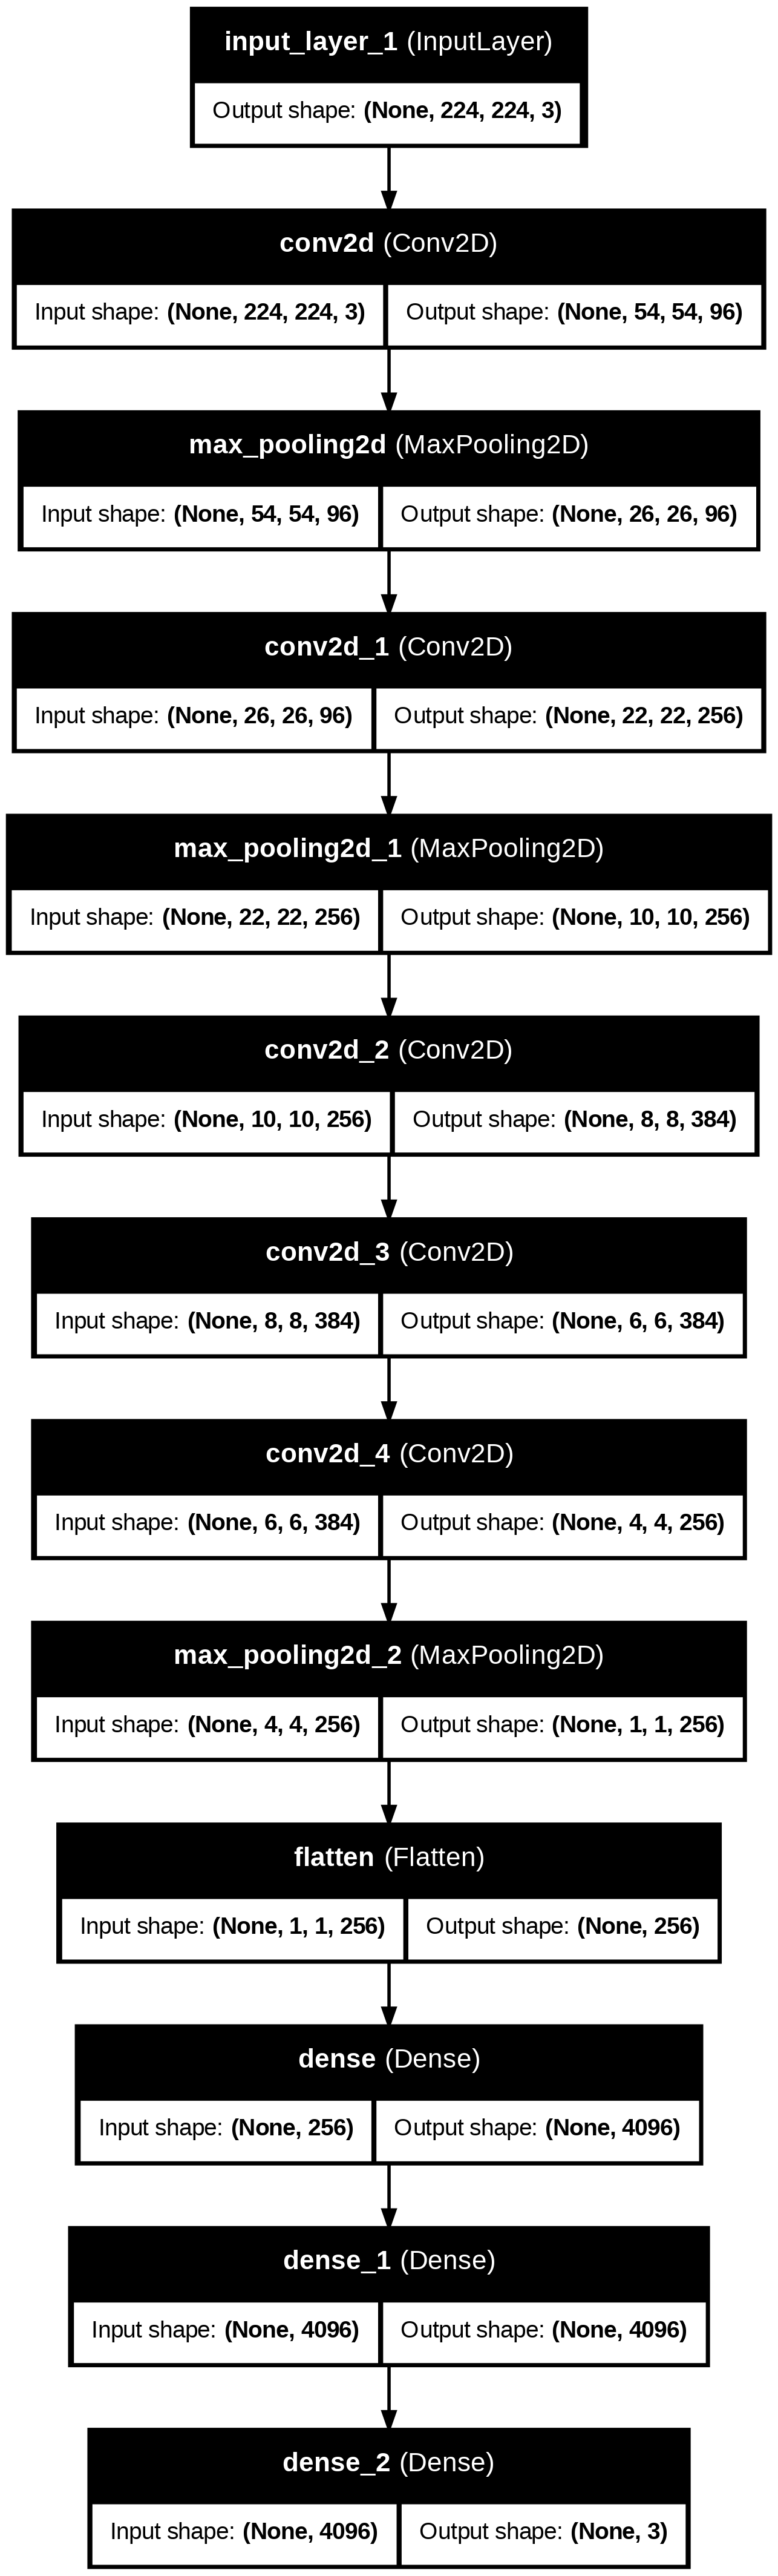

In [13]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from google.colab import drive
from tensorflow.keras.utils import plot_model

# Mount Google Drive
drive.mount('/content/drive')

# Define your data directory path and image size
data_dir = '/content/drive/My Drive/data2/256x256'
alexnet_input_size = (224, 224)  # Image size for AlexNet

# Load and resize image
def load_image(directory, cls, img_file):
    img_path = os.path.join(directory, cls, img_file)
    img = Image.open(img_path).resize(alexnet_input_size)
    return img

# Prepare data
X, y = [], []
label_map = {cls: idx for idx, cls in enumerate(os.listdir(data_dir)) if os.path.isdir(os.path.join(data_dir, cls))}

for cls in label_map.keys():
    cls_dir = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_dir):
        img_path = os.path.join(cls_dir, img_file)
        img = load_img(img_path, target_size=alexnet_input_size)
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(label_map[cls])

X = np.array(X).astype('float32') / 255.0
y = np.array(y).astype('int')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=22)

# Define AlexNet model
def build_alexnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(inputs)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(256, (5, 5), activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(384, (3, 3), activation='relu')(x)
    x = Conv2D(384, (3, 3), activation='relu')(x)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=x)

# Build and compile model
input_shape = (alexnet_input_size[0], alexnet_input_size[1], 3)
num_classes = len(label_map)
model = build_alexnet(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


**Calculate the performance matrix**

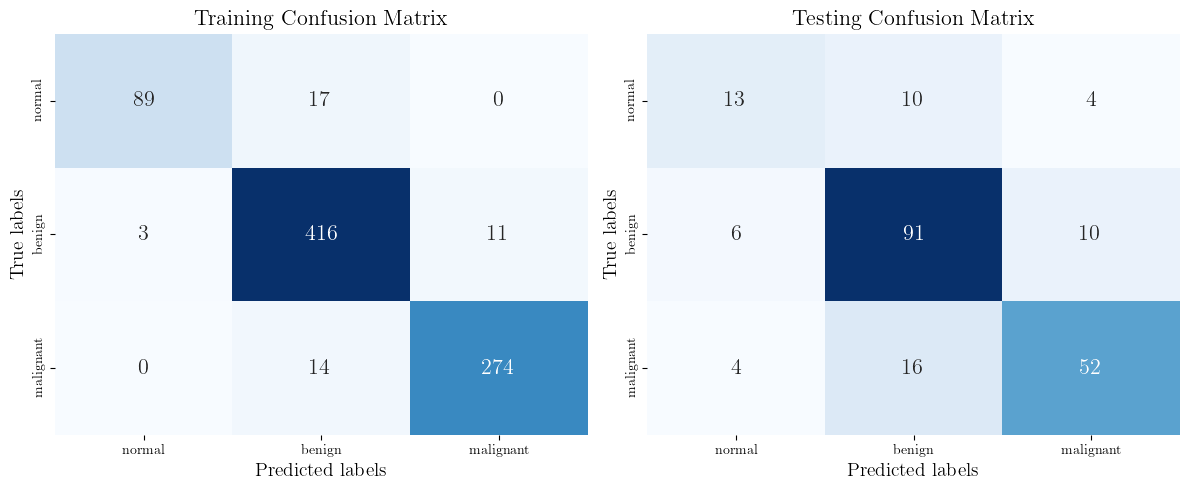

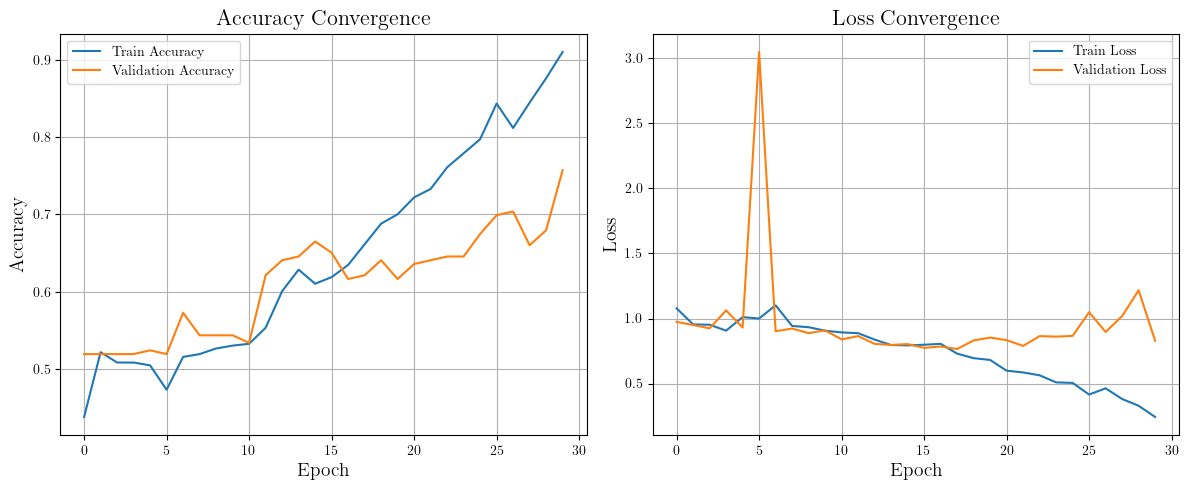

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#=============================================================
# Plot confusion matrices
def plot_confusion_matrices(cm_train, cm_test, class_names, filename='confusion_matrices.png'):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
    })
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm_train, annot=True, fmt='d', ax=axes[0], cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False, annot_kws={"size": 16})
    axes[0].set_title('Training Confusion Matrix', fontsize=16)
    axes[0].set_xlabel('Predicted labels', fontsize=14)
    axes[0].set_ylabel('True labels', fontsize=14)
    sns.heatmap(cm_test, annot=True, fmt='d', ax=axes[1], cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False, annot_kws={"size": 16})
    axes[1].set_title('Testing Confusion Matrix', fontsize=16)
    axes[1].set_xlabel('Predicted labels', fontsize=14)
    axes[1].set_ylabel('True labels', fontsize=14)
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.close()

# Assuming `cm_train` and `cm_test` are already computed
cm_train = confusion_matrix(y_train, train_predictions)
cm_test = confusion_matrix(y_test, test_predictions)
plot_confusion_matrices(cm_train, cm_test, classes, filename='confusion_matrices.png')

#=============================================================
# Plot convergence curves
def plot_convergence_curves(history, filename='convergence_curves.png'):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
    })
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Accuracy Convergence', fontsize=16)
    ax1.set_xlabel('Epoch', fontsize=14)
    ax1.set_ylabel('Accuracy', fontsize=14)
    ax1.legend()
    ax1.grid()
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Loss Convergence', fontsize=16)
    ax2.set_xlabel('Epoch', fontsize=14)
    ax2.set_ylabel('Loss', fontsize=14)
    ax2.legend()
    ax2.grid()
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.close()

# Assuming `history` is already computed
plot_convergence_curves(history, filename='convergence_curves.png')
